# Deep Learning with Python - 3.1
## Binary Classification - IMDb Dataset

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb

In [3]:
# Setting up `numpy` to read in pickle files
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [4]:
# Examining th first element in the dataset
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
# Train and test labels are arrays of 0s and 1s - 0 is a negative review, 1 is a positive reivew
train_labels[0] # this is 1, which means the first review in the dataset is positive

1

In [7]:
# Because we have restricted ourselves to the top 10_000 words
# No word index will exceed 10_000
max([max(sequence) for sequence in train_data]

9999

The code above is a two-step process
- it creates a generator object which returns the maximum number in each sequence of numbers that represent a single review
- it then finds the maximum value of this generator and shows that it is 9999 - since we have limited ourselves to only 10k words, no word index can exceed this.

In [10]:
# Decoding a review - from indexes to words

# word_index is a dictionary that maps words to the numbers they are encoded by
word_index = imdb.get_word_index() 

# Create a new dictionary that reverses the key-value pairing
# They key is a number or word index and the value is the word it encodes
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# We then use the `get` method to find the word encoded by each value in a review
# and then join the resulting words with a ' ' character to create a string representing the review
# Doing this with the first review as an example
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb_word_index.json: None -- [Errno 11001] getaddrinfo failed

## Data Preprocessing
- Can't pass an array of integers representing words into a neural network
- Have to either use an `embedding` layer or one-hot encode the reviews before we feed it into the network

In [14]:
# Naive implementation of one-hot encoding for the input vectors
def vectorize_sequences(sequences, dimension=10000):
    # sequences is a tensor of vectors in which each element is an index representing a word
    # dimension will be the dimension of the one-hot encoded vector for each vector in the array
    results = np.zeros((len(sequences), dimension))
    
    # `enumerate` will create an iterable in which each vector/sequence of words will have an index
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # floating point, not int for every element in the sequence
    return results

In [48]:
# One hot encoding the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [50]:
# Checking what the training data looks like after one-hot encoding
print(x_train[0])
print(x_train[0].shape) # 10000 dimensional vecto

[0. 1. 1. ... 0. 0. 0.]
(10000,)


Now each training example is a 10,000-dimensional vector i.e. a vector with 10,000 columns where only the columns with the same indices as the number encoding the word in the original training sample are 1, and the rest are 0.

In [51]:
# Also vectorize the training labels by casting them to float 32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building a Network

In [24]:
from tensorflow.keras import models, layers

# Create a Sequential Model
model = models.Sequential()

# Add input layer - will accept an arbitrary number of 10,000 dimensional vectors
# Has only 16 hidden units because there are only 2 classes - 16 dimensional space 
# is sufficiently large hypothesis space for us to be able to find a non-linear mapping
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# Add a hidden layer - 16 units, relu activation function
# No need to specify input shape - automatically inferred from output of previous layer
model.add(layers.Dense(16, activation='relu'))

# Add output layer - will output a probability that sample belongs to the positive class
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
# Compiling the model - specifying loss, optimizer, and metrics
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', # because only 2 classes and comparing probabilities
              metrics=['accuracy'])

## Validation Set
The validation set is a subset of the training data that is used to monitor the performance of the neural network during training, primarily as an indicator for overfitting/underfitting. 

In [52]:
# First 10k reviews are validation, remaining 40k are training
x_validation = x_train[:10000]    # reviews 0 to 9999
partial_x_train = x_train[10000:] # revies 9999 to 24999

# Do the same for the labels
y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

## Training Cycle 1 - 20 Epochs, 512 Samples

In [53]:
# The `fit` method will return a `history` object that contains logs
# of all the processes and outputs created during training
history = model.fit(x=partial_x_train, 
                    y=partial_y_train, 
                    batch_size=512, 
                    epochs=20, 
                    validation_data=[x_validation, y_validation])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 437us/sample - loss: 0.0062 - acc: 0.9987 - val_loss: 0.7262 - val_acc: 0.8638
Epoch 2/20
15000/15000 [==============================] - 5s 345us/sample - loss: 0.0017 - acc: 0.9999 - val_loss: 0.7565 - val_acc: 0.8638
Epoch 3/20
15000/15000 [==============================] - 5s 362us/sample - loss: 0.0032 - acc: 0.9997 - val_loss: 0.7898 - val_acc: 0.8643
Epoch 4/20
15000/15000 [==============================] - 5s 358us/sample - loss: 9.6466e-04 - acc: 1.0000 - val_loss: 0.8235 - val_acc: 0.8625
Epoch 5/20
15000/15000 [==============================] - 5s 351us/sample - loss: 0.0063 - acc: 0.9980 - val_loss: 0.8504 - val_acc: 0.8607
Epoch 6/20
15000/15000 [==============================] - 5s 359us/sample - loss: 5.2755e-04 - acc: 1.0000 - val_loss: 0.8637 - val_acc: 0.8617
Epoch 7/20
15000/15000 [==============================] - 6s 383us/sample - loss: 4.5306e-04 - acc: 1.

In [55]:
# Preparing to plot training and validation loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

# History dictionary will contain all metrics
history_dict = history.history

# Getting loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Getting accuracy values
acc = history_dict['acc']
val_acc = history_dict['val_acc']

# Number of epochs = number of entries in the 
epochs = range(1, len(acc) + 1)

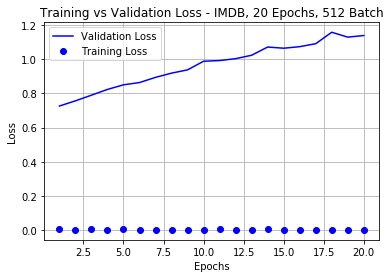

In [57]:
plt.figure()
plt.plot(epochs, val_loss_values, 'b-', label='Validation Loss')
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss - IMDB, 20 Epochs, 512 Batch')
plt.legend()
plt.grid(True)
plt.show()

## Training the Model Again - No Comments, Too Much Clutter

In [58]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [59]:
# Training the model
hist = model.fit(x=partial_x_train, 
                y=partial_y_train, 
                epochs=20, 
                batch_size=512,
                validation_data=[x_validation, y_validation])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 451us/sample - loss: 0.5153 - acc: 0.7815 - val_loss: 0.3892 - val_acc: 0.8705
Epoch 2/20
15000/15000 [==============================] - 5s 358us/sample - loss: 0.3083 - acc: 0.9055 - val_loss: 0.3237 - val_acc: 0.8738
Epoch 3/20
15000/15000 [==============================] - 5s 347us/sample - loss: 0.2295 - acc: 0.9295 - val_loss: 0.2804 - val_acc: 0.8926
Epoch 4/20
15000/15000 [==============================] - 5s 347us/sample - loss: 0.1813 - acc: 0.9427 - val_loss: 0.2883 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 5s 362us/sample - loss: 0.1487 - acc: 0.9542 - val_loss: 0.2817 - val_acc: 0.8861
Epoch 6/20
15000/15000 [==============================] - 5s 350us/sample - loss: 0.1231 - acc: 0.9626 - val_loss: 0.3493 - val_acc: 0.8642
Epoch 7/20
15000/15000 [==============================] - 5s 343us/sample - loss: 0.1043 - acc: 0.9705 - val_l

## Replotting Data

In [60]:
history = hist.history
val_loss = history['val_loss']
loss = history['loss']
val_acc = history['val_acc']
acc = history['acc']

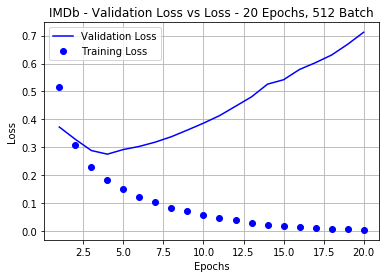

In [62]:
# Plotting loss
plt.figure()
plt.plot(epochs, validation_loss, 'b-', label='Validation Loss')
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.title('IMDb - Validation Loss vs Loss - 20 Epochs, 512 Batch')
plt.legend()
plt.show()

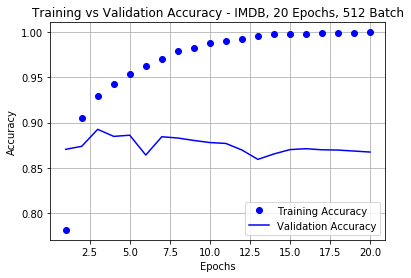

In [64]:
# Now plotting training accuracy
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy - IMDB, 20 Epochs, 512 Batch')
plt.grid(True)
plt.legend()
plt.show()

## Training Cycle 2 - Fewer Epochs to Prevent Overfitting

In [66]:
# Insantiate and Compile
model = models.Sequential()
model.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             metrics=['accuracy'], 
             loss='binary_crossentropy')

In [67]:
# Train
new_hist = model.fit(x=partial_x_train, 
          y=partial_y_train, 
          batch_size=512, 
          epochs=4, 
          validation_data=(x_validation, y_validation),
          verbose=False)

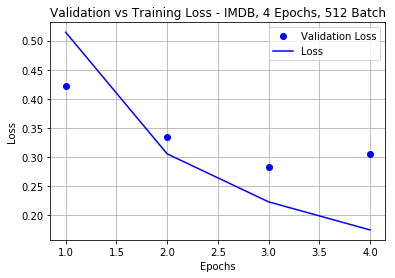

In [76]:
# Plotting accuracy and loss for new model
hist = new_hist.history
loss = hist['loss']
val_loss = hist['val_loss']
acc = hist['acc']
val_acc = hist['val_acc']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
plt.plot(epochs, loss, 'b-', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation vs Training Loss - IMDB, 4 Epochs, 512 Batch')
plt.grid(True)
plt.legend()
plt.show()

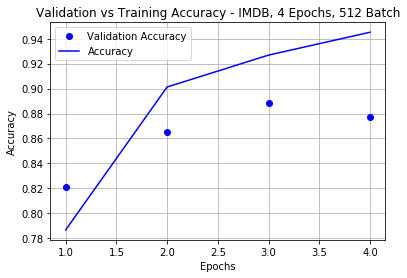

In [77]:
plt.figure()
plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
plt.plot(epochs, acc, 'b-', label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation vs Training Accuracy - IMDB, 4 Epochs, 512 Batch')
plt.grid(True)
plt.legend()
plt.show()

In [78]:
# Outputting the final validation set loss and accuracy
print('Final Validation Loss: ', val_loss[-1])
print('Final Validation Accuracy: ', val_acc[-1])

Final Validation Loss:  0.3048570289134979
Final Validation Accuracy:  0.877


## Making Predictions
Now that we're satisfied that we have not overfit to the training data, we can use our model to make predictions on the test set.

In [84]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 7s 271us/sample - loss: 0.3302 - acc: 0.8652


We get an ~86.52% accuracy on the test data, which is slightly lower than the 87.7% accuracy on the validation data. Since the two readings are roughly the same, we can say that we managed to successfully mitigate the effects of overfitting to some extent.